In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [47]:
# Load the train and test datasets
train_df = pd.read_csv("train_loan_dataset.csv")
test_df = pd.read_csv("test_loan_dataset.csv")

In [54]:
x = train_df
y = test_df

In [55]:
x.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [61]:
y.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [63]:
x.Loan_ID.value_counts(dropna=False)

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

In [64]:
y.Loan_ID.value_counts(dropna=False)

LP001015    1
LP002389    1
LP002383    1
LP002376    1
LP002375    1
           ..
LP001627    1
LP001622    1
LP001613    1
LP001611    1
LP002989    1
Name: Loan_ID, Length: 367, dtype: int64

In [65]:
x.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

In [66]:
y.Gender.value_counts(dropna=False)

Male      286
Female     70
NaN        11
Name: Gender, dtype: int64

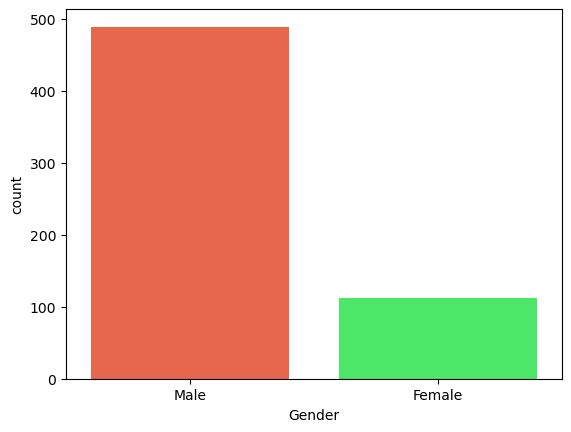

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt


custom_palette = ["#FF5733", "#33FF57"]  

sns.countplot(x="Gender", data=x, palette=custom_palette)
plt.show()


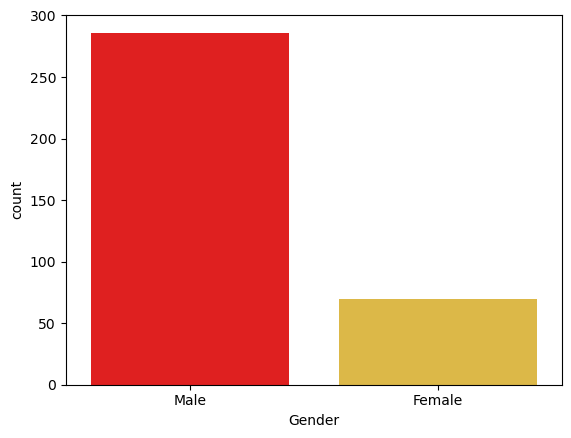

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = ["#ff0000", "#F4C430"]  

sns.countplot(x="Gender", data=y, palette=custom_palette)
plt.show()


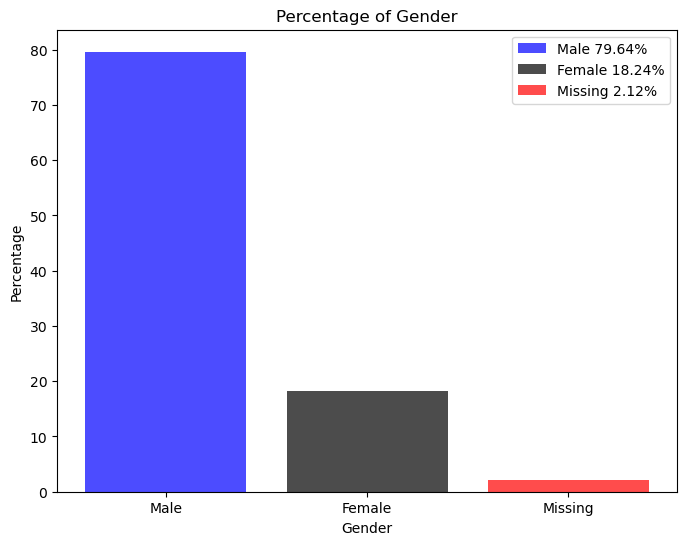

In [78]:
import matplotlib.pyplot as plt

# Calculate percentages
total_count = len(x)
count_male = len(x[x.Gender == 'Male'])
count_female = len(x[x.Gender == 'Female'])
count_null = len(x[x.Gender.isnull()])

percent_male = (count_male / total_count) * 100
percent_female = (count_female / total_count) * 100
percent_null = (count_null / total_count) * 100

# Plot histogram
plt.figure(figsize=(8, 6))
plt.bar(['Male'], [percent_male], color='blue', alpha=0.7, label='Male {:.2f}%'.format(percent_male))
plt.bar(['Female'], [percent_female], color='black', alpha=0.7, label='Female {:.2f}%'.format(percent_female))
plt.bar(['Missing'], [percent_null], color='red', alpha=0.7, label='Missing {:.2f}%'.format(percent_null))
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Percentage of Gender')
plt.legend()
plt.show()

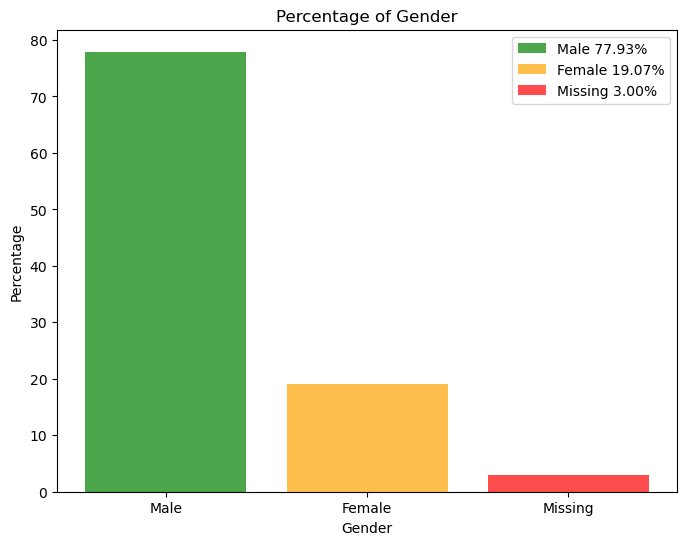

In [83]:
import matplotlib.pyplot as plt

# Calculate percentages
total_count = len(y)
count_male = len(y[y.Gender == 'Male'])
count_female = len(y[y.Gender == 'Female'])
count_null = len(y[y.Gender.isnull()])

percent_male = (count_male / total_count) * 100
percent_female = (count_female / total_count) * 100
percent_null = (count_null / total_count) * 100

# Plot histogram
plt.figure(figsize=(8, 6))
plt.bar(['Male'], [percent_male], color='green', alpha=0.7, label='Male {:.2f}%'.format(percent_male))
plt.bar(['Female'], [percent_female], color='orange', alpha=0.7, label='Female {:.2f}%'.format(percent_female))
plt.bar(['Missing'], [percent_null], color='red', alpha=0.7, label='Missing {:.2f}%'.format(percent_null))
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Percentage of Gender')
plt.legend()
plt.show()

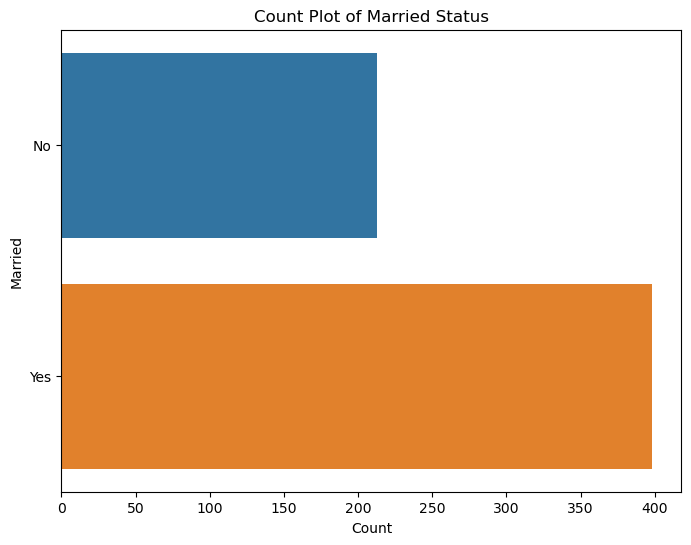

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
plt.figure(figsize=(8, 6))
sns.countplot(y='Married', data=x)
plt.xlabel('Count')
plt.ylabel('Married')
plt.title('Count Plot of Married Status')
plt.show()


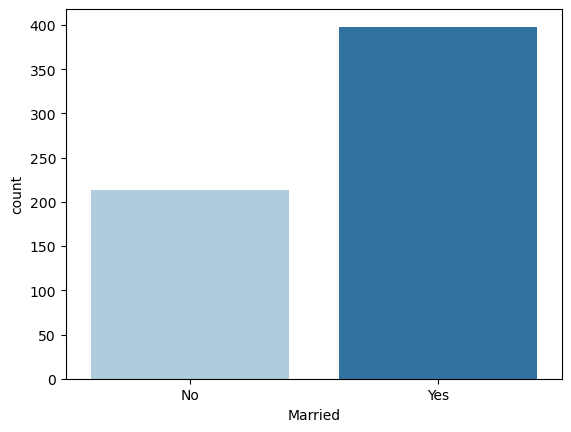

In [89]:
sns.countplot(x="Married", data=x, palette="Paired")
plt.show()

In [93]:
countMarried = len(x[x.Married == 'Yes'])
countNotMarried = len(x[x.Married == 'No'])
countNull = len(x[x.Married.isnull()])

print("Percentage of married: {:.2f}%".format((countMarried / (len(x.Married))*100)))
print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / (len(x.Married))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(x.Married))*100)))

Percentage of married: 64.82%
Percentage of Not married applicant: 34.69%
Missing values percentage: 0.49%


In [94]:
x.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [95]:
y.Education.value_counts(dropna=False)

Graduate        283
Not Graduate     84
Name: Education, dtype: int64

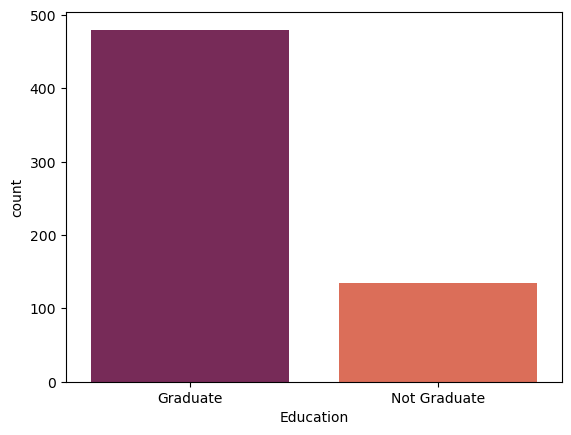

In [96]:
sns.countplot(x="Education", data=x, palette="rocket")
plt.show()

Percentage of graduate applicant: 78.18%
Percentage of Not graduate applicant: 21.82%
Missing values percentage: 0.00%


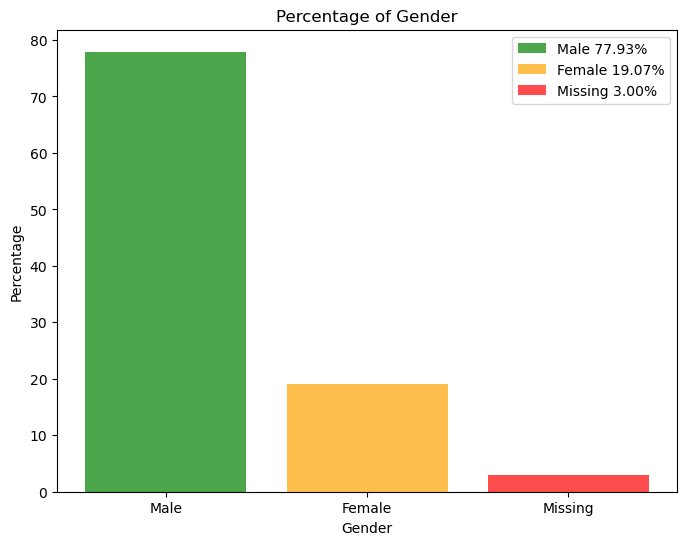

In [99]:
countGraduate = len(x[x.Education == 'Graduate'])
countNotGraduate = len(x[x.Education == 'Not Graduate'])
countNull = len(x[x.Education.isnull()])

print("Percentage of graduate applicant: {:.2f}%".format((countGraduate / (len(x.Education))*100)))
print("Percentage of Not graduate applicant: {:.2f}%".format((countNotGraduate / (len(x.Education))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(x.Education))*100)))

# Plot histogram
plt.figure(figsize=(8, 6))
plt.bar(['Male'], [percent_male], color='green', alpha=0.7, label='Male {:.2f}%'.format(percent_male))
plt.bar(['Female'], [percent_female], color='orange', alpha=0.7, label='Female {:.2f}%'.format(percent_female))
plt.bar(['Missing'], [percent_null], color='red', alpha=0.7, label='Missing {:.2f}%'.format(percent_null))
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Percentage of Gender')
plt.legend()
plt.show()

In [100]:
x.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

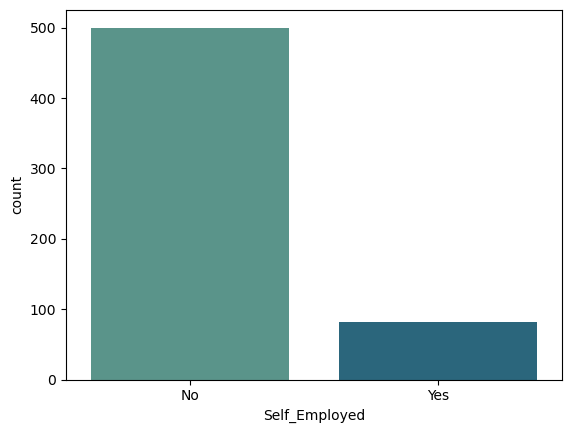

In [101]:
sns.countplot(x="Self_Employed", data=x, palette="crest")
plt.show()

In [102]:
countNo = len(x[x.Self_Employed == 'No'])
countYes = len(x[x.Self_Employed == 'Yes'])
countNull = len(x[x.Self_Employed.isnull()])

print("Percentage of Not self employed: {:.2f}%".format((countNo / (len(x.Self_Employed))*100)))
print("Percentage of self employed: {:.2f}%".format((countYes / (len(x.Self_Employed))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(x.Self_Employed))*100)))

Percentage of Not self employed: 81.43%
Percentage of self employed: 13.36%
Missing values percentage: 5.21%


# CREDIT _HISTORY

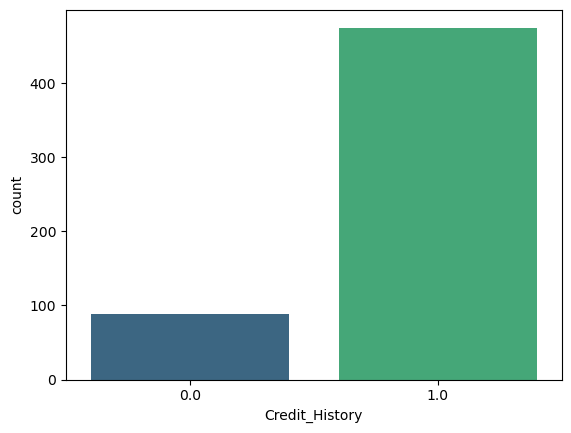

In [105]:
x.Credit_History.value_counts(dropna=False)

sns.countplot(x="Credit_History", data=x, palette="viridis")
plt.show()

In [106]:
count1 = len(x[x.Credit_History == 1])
count0 = len(x[x.Credit_History == 0])
countNull = len(x[x.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(x.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(x.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(x.Credit_History))*100)))

Percentage of Good credit history: 77.36%
Percentage of Bad credit history: 14.50%
Missing values percentage: 8.14%


# PROPERTY_AREA

In [107]:
x.Property_Area.value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

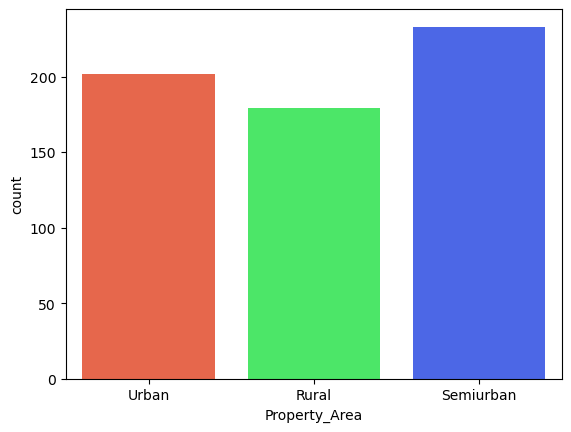

In [113]:


custom_palette = ["#FF5733", "#33FF57", "#3357FF"]  

sns.countplot(x="Property_Area", data=x, palette=custom_palette)
plt.show()

In [111]:
countUrban = len(x[x.Property_Area == 'Urban'])
countRural = len(x[x.Property_Area == 'Rural'])
countSemiurban = len(x[x.Property_Area == 'Semiurban'])
countNull = len(x[x.Property_Area.isnull()])

print("Percentage of Urban: {:.2f}%".format((countUrban / (len(x.Property_Area))*100)))
print("Percentage of Rural: {:.2f}%".format((countRural / (len(x.Property_Area))*100)))
print("Percentage of Semiurban: {:.2f}%".format((countSemiurban / (len(x.Property_Area))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(x.Property_Area))*100)))

Percentage of Urban: 32.90%
Percentage of Rural: 29.15%
Percentage of Semiurban: 37.95%
Missing values percentage: 0.00%


In [112]:
x.Loan_Status.value_counts(dropna=False)

Y    422
N    192
Name: Loan_Status, dtype: int64

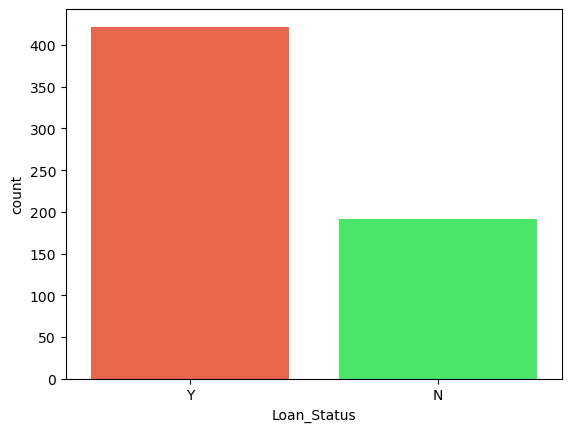

In [115]:
custom_palette = ["#FF5733", "#33FF57"] 
sns.countplot(x="Loan_Status", data=x, palette=custom_palette )
plt.show()

In [116]:
countY = len(x[x.Loan_Status == 'Y'])
countN = len(x[x.Loan_Status == 'N'])
countNull = len(x[x.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(x.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(x.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(x.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%
